# **Analysis of Molecular Geometries 1.**


Structural information about molecular systems can be obtained from various sources such as spectroscopy, crystallography, molecular dynamics or quantum chemical simulations. These data are can be then stored in various formats depending on their origin and intended applications. Apart from simple information about types of atoms and their positions in space, structural data may include information about bonding, protein or nucleic acid residues, atom types (biological systems), properties (atomic numbers, charges), energies etc. 

In this workshop, you will learn how to visualize and manipulate structural data based on vector algebra. Most importantly you will learn how to perform analysis on complex files with molecular structures in order to understand and interpret various chemical phenomena.

Below you can find brief description of the most popular file formats used to store information on molecular structure:
   
   * **xyz files** - contain atom names and their Cartesian coordinates in separate columns, in Angstroms. First line defines the number of atoms, while the second line a comment (e.g. energy, molecule name etc.).
   * **pdb files** - a more complex format with atomic Cartesian coordinates used for biological systems. Contain information about atom types and residues.
   * **Z-matrices** - contain information about bonding parameters, valence angles and dihedral angles. Can be used for constructing simple molecules in a ordinary text editors.
   * **CIF files** - crystallographic information files. Contain crystal structure and information about the periodic unit cell of the given material.
   
While there are many other file formats for representing molecular structures, we will primarily focus on the three first types. In particular we will learn how to extract valuable information and how to convert different file formats into other types. We will start the simplest format, i.e. xyz files. Lest us start with considering a simple xyz file containing the structure of formamide. To view the contents of the formamide-min.xyz file in your directory, assign variable ```molecule``` to it which will contain the output of the ```open(...).read()``` method. Then print the result:





In [2]:
### Solution:

molecule=open('formamide-min.xyz','r').read()
print(molecule)

6
formamide
  C    0.09595764634995      0.05127344307728     -0.10000522615731
  O    0.28133172483522     -0.15000356830941      1.08077793895232
  H    0.92120376351115      0.34424445569810     -0.80768779789049
  N   -1.10609182447786     -0.04581080881528     -0.74095354364749
  H   -1.93979629136455     -0.29516637575576     -0.21181473151668
  H   -1.19688137738638      0.15868785917012     -1.73175799027395



While the contents of the above file provides some information about the atomic composition of our molecule, it is very hard to imagine its structure. To visualize the structure we will use the py3Dmol module, which allows to generate the viewing window, select preferred style of the molecular representation and rotate or zoom in/out the molecule with the mouse.

In [ ]:
!pip install py3dmol

In [1]:
import py3Dmol

file = open('formamide-min.xyz','r')
molecule=file.read()
file.close()
view = py3Dmol.view()
view.addModel(molecule,'xyz')
view.setViewStyle({'style': 'outline', 'color': 'black', 'width': 0.05})
view.setStyle({'stick': {'radius': .1}, 'sphere': {'scale': 0.25}})
view.zoomTo()
view.show()


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### **Exercise 1.**

Modify the above script by changing parameters in ViewStyle and Style (bond and sphere radii). Test the following settings separately (one at a time):
```
view.addPropertyLabels('atom','','')
view.addPropertyLabels('index','','')
```

### **Exercise 2.**

Create a function ```molview```, which will contain you preferred settings to view xyz files. It should also enable displaying atomic indices (numbers) as labels. 

## **Analysing xyz files with Python3**

## Parsing xyz files.

As you have noticed, the information provided by xyz files is limited to the positions of different atoms in 3-dimensional space. However, with some additional analysis we can learn more about the molecule itself by measuring bond lengths, angles, calculating the numbers of atoms of a given elements of the molecular mass. Firstly, we need to parse the file into separate lines with the ```.readlines()``` function. This allows us to create a list of all lines in the file:

In [1]:
### Solution
file = open('formamide-min.xyz','r')
lines = file.readlines()
### remember to close the file
file.close()

print(lines)

['6\n', 'formamide\n', '  C    0.09595764634995      0.05127344307728     -0.10000522615731\n', '  O    0.28133172483522     -0.15000356830941      1.08077793895232\n', '  H    0.92120376351115      0.34424445569810     -0.80768779789049\n', '  N   -1.10609182447786     -0.04581080881528     -0.74095354364749\n', '  H   -1.93979629136455     -0.29516637575576     -0.21181473151668\n', '  H   -1.19688137738638      0.15868785917012     -1.73175799027395\n']



As you see, the ```.readlines()``` function creates a list of lines from a text file, each of them ending with the ```\n``` sign which is used mark the of the line in text files on linux-based platforms. For the majority of analyses, we will only need the lines containing atomic specification. Using list ranges, print only the lines containing atomic specifications:

In [4]:
### Solution

print(lines[2:])

['  C    0.09595764634995      0.05127344307728     -0.10000522615731\n', '  O    0.28133172483522     -0.15000356830941      1.08077793895232\n', '  H    0.92120376351115      0.34424445569810     -0.80768779789049\n', '  N   -1.10609182447786     -0.04581080881528     -0.74095354364749\n', '  H   -1.93979629136455     -0.29516637575576     -0.21181473151668\n', '  H   -1.19688137738638      0.15868785917012     -1.73175799027395\n']


In order to extract the information on atom types and their positions, we need to further parse each line using the ```.split()``` function (apart from the first two lines). This function generates a list of elements present in each line. Without any attribute it assumes that the elements are separated by spaces. Print such a list of elements for the oxygen atom of formamide:

In [4]:
### Solution:

print(lines[3].split())
list1 = lines[3].split()
print(' '.join(list1))


['O', '0.28133172483522', '-0.15000356830941', '1.08077793895232']
O 0.28133172483522 -0.15000356830941 1.08077793895232


Now, using a for loop, create a separate list containing all atom names (in this case 6 elements) and count the number of atoms by applying the ```.count()``` method. 

In [8]:
### Solution:

atoms=[]
for line in lines[2:]:
    atoms.append(line.split()[0])
print('List of all atoms in formamide:',atoms)
print('Number of H atoms in this molecule is equal to',atoms.count('H'))
print('Number of N atoms in this molecule is equal to',atoms.count('N'))
print('Number of C atoms in this molecule is equal to',atoms.count('C'))

List of all atoms in formamide: ['C', 'O', 'H', 'N', 'H', 'H']
Number of H atoms in this molecule is equal to 3
Number of N atoms in this molecule is equal to 1
Number of C atoms in this molecule is equal to 1


At this stage you might be thinking how to easily extend the above fragment of code in order to calculate the molecular mass of any molecule in an xyz file. This task can be greatly simplified with the use of dictionaries, another composite data type used in Python3.

## Interlude: dictionaries.

Dictionary is a table similar to lists and tuples, which uses keys instead of indices. A key can be almost any Python object, e.g. string, number, tuple etc. Using self-explanatory keys may help to keep python scripts easy to understand. For instance, imagine
a script that deals with a protein and at some point it is supposed to count how many residues of each type are in the protein. The result can be conveniently stored in a dictionary:


In [2]:
residues = { "ALA" : 21, "GLY" : 14, "PRO" : 3, "CYS" : 2 }

Here, we use the residue names as keys that correspond to occurrences (values). The syntax of a dictionary is following: the pairs key-value are separated with commas and each pair is separated by a colon, key : value. It is also possible to create an empty dictionary, add subsequently add new pairs to it: 


In [11]:
# Add a new pair:
residues["TYR"]=4
print(residues)

{'ALA': 21, 'GLY': 14, 'PRO': 3, 'CYS': 2, 'TYR': 4}


To modify the existing value, just provide a dirrent value for the key present in your dictionary and print the contents:

In [12]:
### Solution

# Change the value
residues["TYR"]=1
print(residues)

{'ALA': 21, 'GLY': 14, 'PRO': 3, 'CYS': 2, 'TYR': 1}


If your values are integers, just as in our residues dictionary, you may also increment them as any other integer:

In [14]:
### Solution

# Increment the existing value
residues["TYR"] +=1
print(residues)

{'ALA': 21, 'GLY': 14, 'PRO': 3, 'CYS': 2, 'TYR': 3}


To print the value for a given key, you should use the following syntax: 

In [4]:
print(residues["ALA"])
key = "ALA"
value = residues[key]
print(value)

21
21


To print only the available keys you can use the ```.keys()``` method. Use this method to check what keys are currently present in the dictionary:

In [16]:
### Solution

print(residues.keys())

dict_keys(['ALA', 'GLY', 'PRO', 'CYS', 'TYR'])


The ```.keys()``` method is useful when you want to iterate over the dictionary in a loop:

In [13]:
for k in residues.keys():
    print("%3s = %d" % (k, residues[k]))

ALA = 21
GLY = 14
PRO = 3
CYS = 2
TYR = 2


### **Exercise 3.**

Create a dictionary ```atmass``` containing C, N, O and H atoms as keys and their atomic masses (in atomic units) as values. Next, write a fuction which will iterate over any xyz file and return the molecular mass of the molecule. Use this function to calculate the molecular mass of formamide based on the provided xyz file.

In [1]:
atmass = {'C': 12, 'N': 14, 'O': 16, 'H': 1}

def molecularmass(file):
    file=open(file,'r')
    lines=file.readlines()
    file.close()
    
    atoms=[]
    
    for line in lines[2:]:
        atoms.append(line.split()[0])
    
    no_C = atoms.count('C')
    no_N = atoms.count('N')
    no_H = atoms.count('H')
    no_O = atoms.count('O')
    
    mol_mass=no_C*atmass['C']+no_N*atmass['N']+no_H*atmass['H']+no_O*atmass['O']
    return mol_mass

molecularmass('formamide-min.xyz')

45

## Measuring structural parameters - bond lengths

Chemists like think about molecules in terms of simple and measurable parameters such as bond lengths, angles and dihedral angles. These parameters are referred to as internal coordinates and are used to represent geometrices of molecules in another file type, Z-matrices. You can extract this information from any xyz file using vector algebra. Coordinates of points in space and vectors can be conveniently stored as lists. Let us first define two points in space and create a vector pointing from A to B:

In [18]:
A = [0.15,-0.2,0.1]
B = [0.3,0.1,0.2]
vector1 = [B[0]-A[0],B[1]-A[1],B[2]-A[2]]
print(vector1)

[0.15, 0.30000000000000004, 0.1]


To calculate the distance between the points A and B, we need to determine the lenght of the vector using the formula:

$||v||$=$\sqrt{(x_B-x_A)^2+(y_B-y_A)^2+(z_B-z_A)^2}$

Calculate and print the distance between these points. Remember to import the proper function from the math module to calculate the square root. You can easily find it with the google browser:

In [19]:
### Solution

from math import sqrt

v=sqrt((B[0]-A[0])**2+(B[1]-A[1])**2+(B[2]-A[2])**2)
print(v)

0.35000000000000003


You can also estimate the length based on the components of vector1:

In [20]:
### Solution

v=sqrt(vector1[0]**2+vector1[1]**2+vector1[2]**2)
print(v)

0.35000000000000003


The same principle can now be used to calculate distances in between any pair of atoms in an xyz file. It is important to remember that after parsing the xyz file, atomic coordinates need to be converted from the string format into a floating point number with the ```float()``` function.

### **Exercise 4.**

Create a function ```bondlength``` which accepts a list of lines from an xyz file and two atomic indices as arguments, and returns the dinstance between the two atoms (in $\overset{\circ}{A}$). Next, check the atomic indices of the C and O atoms (you may use py3Dmol) and calculate the C=O bond length for the provided geometry of formamide.

In [3]:
### Solution

from math import sqrt

def bond(at1,at2,coordslist):
        atom1=coordslist[at1+2].split()
        atom2=coordslist[at2+2].split()
        A=[float(atom1[1]),float(atom1[2]),float(atom1[3])]
        B=[float(atom2[1]),float(atom2[2]),float(atom2[3])]
        j=[B[0]-A[0],
           B[1]-A[1],
           B[2]-A[2]]
        bondl=sqrt(j[0]**2+j[1]**2+j[2]**2)
        return bondl

file = open('formamide-min.xyz','r')
lines=file.readlines()
file.close()
print(bond(0,1,lines))



1.2120746129233697


## Measuring structural parameters - valence angles

Treating bonds as vectors allows calculating valence angles in an almost as easy was way as measuring bond lengths. For this purpose we will use the scalar product:

$a\cdot b$ = $||a||$ $||b||cos\theta$

To measure the valence angle between C-O and C-N bonds in formamide, we first need to read the atomic coordinates from the provided xyz file: 

In [5]:
file=open('formamide-min.xyz','r')
coords=file.readlines()[2:]
file.close()
print(coords)

['  C    0.09595764634995      0.05127344307728     -0.10000522615731\n', '  O    0.28133172483522     -0.15000356830941      1.08077793895232\n', '  H    0.92120376351115      0.34424445569810     -0.80768779789049\n', '  N   -1.10609182447786     -0.04581080881528     -0.74095354364749\n', '  H   -1.93979629136455     -0.29516637575576     -0.21181473151668\n', '  H   -1.19688137738638      0.15868785917012     -1.73175799027395\n']


The C, O and N atomic specifications can be found as the 1st, 2nd and 4th element in the list, respectively. The corresponding list indices are 0, 1 and 3. We will use these indices to create the C-O and C-N vectors and calculate their lengths: 

In [24]:
from math import sqrt

x_co=float(coords[0].split()[1])-float(coords[1].split()[1])
y_co=float(coords[0].split()[2])-float(coords[1].split()[2])                                      
z_co=float(coords[0].split()[3])-float(coords[1].split()[3])
                                       
co=[x_co,y_co,z_co]
co_length=sqrt(x_co**2+y_co**2+z_co**2)
print('CO vector:',co)
print('CO vector length:',co_length)


CO vector: [-0.18537407848527002, 0.20127701138669, -1.1807831651096299]
CO vector length: 1.2120746129233697


Now create the C-N vector accordingly:

In [25]:
### Solution

x_cn=float(coords[0].split()[1])-float(coords[3].split()[1])
y_cn=float(coords[0].split()[2])-float(coords[3].split()[2])                                      
z_cn=float(coords[0].split()[3])-float(coords[3].split()[3])
                                       
cn=[x_cn,y_cn,z_cn]
cn_length=sqrt(x_cn**2+y_cn**2+z_cn**2)
print('CN vector:',cn)
print('CN vector length:',cn_length)

CN vector: [1.20204947082781, 0.09708425189256, 0.64094831749018]
CN vector length: 1.365709715853427


### **Exercise 5.**

Calculate the O-C-N valence angle using the above bond vectors and the transformed formula for scalar (dot) product:

$\theta$ = $acos(\frac{a\cdot b}{||ab||})$

For this purpose use the ```dot()``` function available in numpy module and the ```acos()``` function available in math. The angle returned by the latter function is given in radians. Use google to find the function, which will transform the result from radians to degrees. 


In [27]:
### Solution

import numpy as np
from math import acos

theta=acos(np.dot(co,cn)/(co_length*cn_length))
# The acos function returns the angle in radians and we still need to transform it to degrees.
theta_deg=np.degrees(theta)
print('The valence O-C-N angle amounts to',theta,'radians or',theta_deg,'degrees.')


The valence O-C-N angle amounts to 2.1895328517455046 radians or 125.45099151026079 degrees.


## Working with xyz trajectory files.

xyz files may contain more geometries written one after another. This allows to store trajectories, e.g. information about the evolution of atomic coordinates of a given molecular system in time frame. Trajectories can be generated through molecular dynamics simulations and subsequent structures correspond to different, consecutive time steps. This format can be also used to store reaction paths, either optimized or obtained with simple interpolation between substrates and products. 

Similarly as in the case of an xyz file containing a single structure, simple xyz trajectories can be viewed using the py3Dmol module:

In [10]:
import py3Dmol

file = open('trajectory.xyz','r')
trajectory=file.read()
file.close()
view = py3Dmol.view()
# use addModelsAsFrames() instead of addModel for a single structure
view.addModelsAsFrames(trajectory,'xyz')
view.setViewStyle({'style': 'outline', 'color': 'black', 'width': 0.01})
view.setStyle({'stick': {'radius': .15}, 'sphere': {'scale': 0.25}})
# settings for the animation:
view.animate({'loop':'forward','interval':10,'reps':1},viewer=(0,0))
view.zoomTo()
view.show()


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Every structure in the provided trajectory.xyz corresponds to time step of 1 fs and the entire trajectory is 100 fs long. In this particular file, every second line of each structure block contains the energy of the molecule (calculated with a semi-empirical density functional theory approach). Therefore we can plot the energy of the energy of formamide in time frame.

### **Exercise 5.**

Parse the trajectory file and extract the energy of the molecule at each time step using a for loop. Lines containing energies for each frame start with the ' energy:' phrase and can be located found with a python function. Append each energy in the ```energies``` list so that they appear there in the same order as in the formamide-traj.xyz file.  

Create a list with timesteps at the same time. Considering that the first geometry corresponds to the energy of the molecule after 1 fs of the dynamics and subsequent geometries were collected after 1 fs steps, you should get a list with 100 numbers from 1 to 100. Start with t=1 and increment the time step ```t``` every time the script finds the line containing energy

*Hint:*
```
traj=open(...
t=1
energies=[]
timesteps=[]

for line in traj:
    if line...:
        energy=...
        ...
```
Print the contents of the lists to make sure the energies and timesteps were correctly extracted.



In [12]:
### Solution

file=open('trajectory.xyz','r')
traj=file.readlines()
file.close()
t=1
energies=[]
timesteps=[]

for line in traj:
    if line.startswith(' energy:'):
        energy=line.split()[1]
        energies.append(float(energy))
        timesteps.append(t)
        t+=1
print(energies)
print(timesteps)


[-10.644255438951, -10.641273096641, -10.636203686123, -10.633861755653, -10.634945977908, -10.637109321126, -10.637355959654, -10.635314643628, -10.633997072289, -10.633603532959, -10.632970434331, -10.632265171464, -10.631550460588, -10.631154596382, -10.630945015226, -10.63027788052, -10.628967260438, -10.62965644534, -10.63435181085, -10.637605306264, -10.634728139883, -10.630131842663, -10.630837126261, -10.635777001261, -10.638990965027, -10.63760292614, -10.633670031273, -10.633180418195, -10.637066710037, -10.639513377094, -10.638669146697, -10.637054166734, -10.635950127622, -10.635436530454, -10.636180880089, -10.636433596046, -10.635529868833, -10.636070500491, -10.636071390716, -10.632941409214, -10.629554120583, -10.629877810063, -10.633600236873, -10.636917493056, -10.636144865057, -10.631702893918, -10.63027624688, -10.634432210326, -10.636858223134, -10.634091878426, -10.630577337281, -10.630089819773, -10.631900851437, -10.633898012331, -10.63472672993, -10.63532036024

### **Exercise 6.**

Sometimes, specific values which appear in regular positions in a trajectory file are not characterized common beginning of the line. Propose an alternative way of finding all of the lines containing the energy.

*Hint: After parsing the file into a list of lines, use the formula giving the indices of all lines containing the energy. The energies can be extracted by iterating over the list of lines in the following way:*
```
steps=100
for n in range(steps):
    lineindex=n*8+1
    energy=traj[...
```

In [13]:
### Solution

steps=100
file=open('trajectory.xyz','r')
traj=file.readlines()
file.close()
t=1
energies=[]
timesteps=[]


for n in range(steps):
    lineindex=n*8+1
    energy=traj[lineindex].split()[1]
    energies.append(float(energy))
    timesteps.append(t)
    t+=1
print(energies)
print(timesteps)




[-10.644255438951, -10.641273096641, -10.636203686123, -10.633861755653, -10.634945977908, -10.637109321126, -10.637355959654, -10.635314643628, -10.633997072289, -10.633603532959, -10.632970434331, -10.632265171464, -10.631550460588, -10.631154596382, -10.630945015226, -10.63027788052, -10.628967260438, -10.62965644534, -10.63435181085, -10.637605306264, -10.634728139883, -10.630131842663, -10.630837126261, -10.635777001261, -10.638990965027, -10.63760292614, -10.633670031273, -10.633180418195, -10.637066710037, -10.639513377094, -10.638669146697, -10.637054166734, -10.635950127622, -10.635436530454, -10.636180880089, -10.636433596046, -10.635529868833, -10.636070500491, -10.636071390716, -10.632941409214, -10.629554120583, -10.629877810063, -10.633600236873, -10.636917493056, -10.636144865057, -10.631702893918, -10.63027624688, -10.634432210326, -10.636858223134, -10.634091878426, -10.630577337281, -10.630089819773, -10.631900851437, -10.633898012331, -10.63472672993, -10.63532036024

Now we can use the two lists to plot the energy of the molecule in time frame. For this purpose you need to import the ```matplotlip.pylab``` module and use the ```plot(x, y) function```. Use the timesteps as x and energies as y.


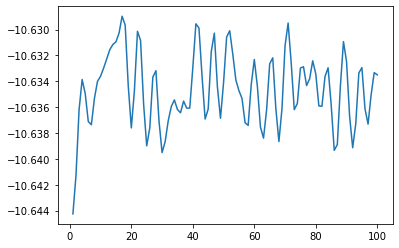

In [32]:
### Solution

import matplotlib.pylab as plt

plt.plot(timesteps, energies)
plt.show()
